# seaborn

seaborn이란?

matplotlib을 기반으로 다양한 색상 테마와 통계용 도표 등의 기능을 추가한 시각화 패키지다.
기본적인 시각화 기능은 matplotlib 패키지를, 통계 기능은 statsmodels 패키지를 기반으로 한다.
아래의 링크에서 seaborn에 대해 더 자세히 찾아볼 수 있다.
https://seaborn.pydata.org/index.html
matplotlib과 비교했을때 여러 장점이 있다.

- 시각적으로 더 보기 좋다.
- 데이터를 다루는 라이브러리인 판다스의 데이터프레임 기능을 제공하기 때문에 CSV 파일 등의 전체 데이터 세트에서 데이터를 불러와서 그릴 수 있다.
- 보다 많은 차트와 색 테마들을 지원한다.
- 그래프를 보다 쉽게 그려준다.
- 데이터의 패턴이나 형상을 그리는데 장점을 보인다.

단점은 다음과 같다.

- matplotlib와의 호환성 문제로 matplotlib에서 작동하는 함수들이 seaborn에서 작동하지 않는 경우가 간혹 있다.

# seaborn 설치 및 불러오기

In [ ]:
!python -m pip install --upgrade matplotlib numpy seaborn
# !pip install --upgrade matplotlib numpy seaborn

In [2]:
# 버전 확인하기
import matplotlib, numpy, seaborn
print('Matplotlib version...', matplotlib.__version__)
print('NumPy version........', numpy.__version__)
print('Seaborn version........', seaborn.__version__)

Matplotlib version... 3.7.1
NumPy version........ 1.22.4
Seaborn version........ 0.12.2


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
import seaborn as sns

In [ ]:
# for Jupyter notebook # 한글폰트 설치
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    rc('font', family = 'AppleGothic')

elif platform.system() == 'Windows': # 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

# Seaborn 제공 함수

seaborn에서 제공하는 그래프는 다음과 같다.

- histplot():히스토그램
- kdeplot():커널밀도추정함수 그래프
- displot():분포도
- rugplot():러그플롯
- barplot():막대그래프
- pointplot() : 포인트플롯
- boxplot(): 박스플롯
- violinplot():바이올린플롯
- countplot():카운트플롯

# 막대 그래프


seaborn에서 막대 그래프는 수치형 값의 특정 집계(평균, 합계 등)를 동일한 너비의 여러 막대로 표시하고 각 막대 위에 오차 막대를 그려주는 그래프다.

막대 그래프를 작성하려면 barplot 메소드를 주로 barplot(x=None, y=None, hue=None, data=None, order=None, estimator=<function mean at 0x10a2a03b0>, ci=95) 형식으로 사용하면 된다.

- x, y 에는 데이터의 변수명을 입력한다.
- hue 에도 데이터의 변수명을 입력하며 생성된 막대들을 입력한 변수의 범주에 따라 색으로 나눠준다.
- data 는 입력하는 전체 데이터의 이름이다.
- order는 입력한 범주형 변수의 범주들을 문자열의 리스트로 입력하여 각 범주가 그래프에 막대로 그려지는 순서를 설정한다.

barplot 메소드로 출력하는 도표는 하나이므로 x축과 y축을 라벨링할 때 pyplot.xlabel 과 pyplot.ylabel 메소드를 호출하면 된다.

범주별로 생성되는 막대들의 눈금에 라벨을 붙이려면 barplot 메소드가 반환하는 객체인 AxesSubplot을 새로운 변수로 할당하고 set_xticklabels 을 사용한다.

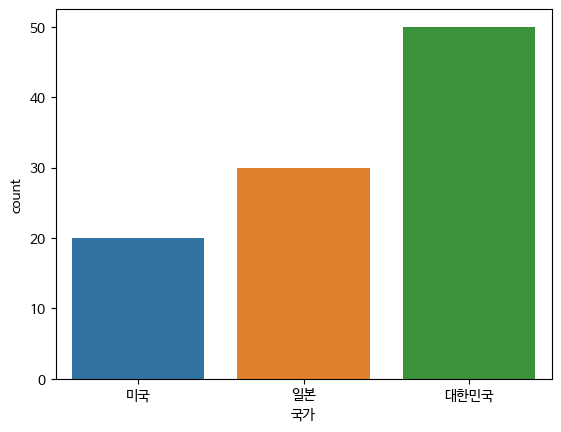

In [3]:
x = np.arange(3)
y = [20, 30, 50]

## type your code ##
ax=sns.barplot(x=x,y=y)
ax.set_xticklabels(["미국","일본","대한민국"])

plt.xlabel("국가")
plt.ylabel("count")

plt.show()

In [4]:
# make datasets
data = {
    'page': ['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd'],
    'gender': ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female'],
    'avg_age': [23, 34, 31, 40, 30, 40, 23, 42]
}

df = pd.DataFrame(data)
df.head()

,page,gender,avg_age
0,a,male,23
1,b,male,34
2,c,male,31
3,d,male,40
4,a,female,30


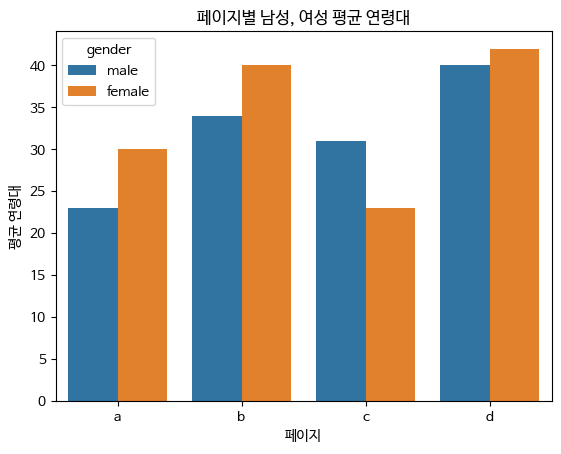

In [5]:
## type your code ##
sns.barplot(data=df,x='page',y='avg_age',hue='gender')

plt.title("페이지별 남성, 여성 평균 연령대")
plt.xlabel("페이지")
plt.ylabel("평균 연령대")
plt.show()

## 연습문제 1-1

우리가 사용할 dataset은 seaborn에서 제공하는 diamonds dataset이다. diamonds dataset에서 우리는 다이아몬드가 얼마나 clear한지(clarity), 그리고 다이아몬드의 퀄리티는 어떠한지(cut)에 따른 평균 가격(price)의 분포가 궁금하여 막대 그래프를 그리고자 한다. 아래의 과정에 따라 diamonds dataset에서 막대 그래프를 그려보자.

조건은 다음과 같다.
- title은 "clarity, cut에 따른 mean price"이다.
- x축 라벨은 "clarity"이다.
- y축 라벨은 "평균 가격"이다.

In [6]:
# loading dataset
# 결과로 출력되는 5개의 행은 diamonds dataset에서 상위 5개 데이터를 추출한 것이다.
# 이를 통해 diamonds dataset이 어떻게 구성되어 있는지 알 수 있다.
# 우리가 관심있는 column은 clarity, cut, price이다.
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# diamonds dataset에서 clarity, cut에 따른 평균 가격을 groupby를 이용하여 계산한다.
group_diamonds = diamonds.groupby(['clarity', 'cut']).mean()[['price']]
group_diamonds.reset_index(level=1, inplace=True)
group_diamonds.reset_index(level=0, inplace=True)

group_diamonds

<ipython-input-7-5219cdc6e901>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_diamonds = diamonds.groupby(['clarity', 'cut']).mean()[['price']]


,clarity,cut,price
0,IF,Ideal,2272.913366
1,IF,Premium,3856.143478
2,IF,Very Good,4396.216418
3,IF,Good,4098.323944
4,IF,Fair,1912.333333
5,VVS1,Ideal,2468.129458
6,VVS1,Premium,2831.206169
7,VVS1,Very Good,2459.441065
8,VVS1,Good,2254.774194
9,VVS1,Fair,3871.352941


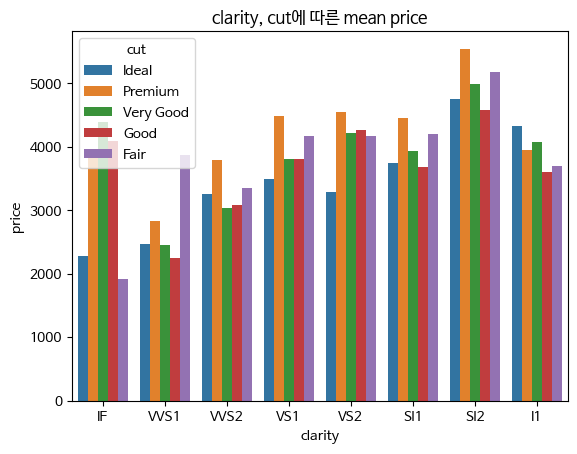

In [8]:
## type your code ##
plt.title("clarity, cut에 따른 mean price") # 타이틀 입력
plt.xlabel("clarity") # x label 입력
plt.ylabel("평균 가격") # y label 입력

# bar plot 그리기 #
sns.barplot(data=group_diamonds,x='clarity',y='price', hue='cut')
plt.show();

# 카운트 플롯 (Countplot)

카운트 플롯은 각 범주별로 데이터가 얼마나 있는지 나타낼 수 있다.

카운트 플롯을 작성하려면 countplot 메소드를 주로 countplot(x=None, y=None, hue=None, data=None, color=None, palette=None) 형식으로 사용하면 된다.

- x, y, hue 는 데이터의 열 이름(변수명) 문자열이다.
    - x 와 y 는 동시에 입력할 수 없다.
    - x 만 입력하면 세로로 막대가 그려지고 y 만 입력하면 가로로 막대가 그려진다.
    - hue 를 같이 사용하면 범례가 생성되며 다른 범주와 함께 비교할 수 있다.
- data 는 입력하는 전체 데이터 값이다.
- color 는 막대의 색상을 설정한다.
- palette 는 color를 지정하지 않았을 때 자동으로 칠하는 색상 순서를 설정한다. 기본값으로는 파랑, 주황, 초록, 빨강 등의 순서로 칠해지는데 ‘Set3’ 등으로 설정할 수 있다.

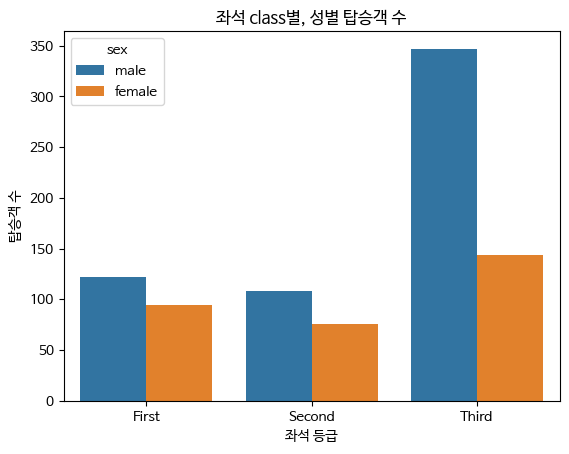

In [10]:
df = sns.load_dataset("titanic")

## type your code ##
sns.countplot(data=df,x='class',hue='sex')

plt.title("좌석 class별, 성별 탑승객 수")
plt.ylabel("탑승객 수")
plt.xlabel("좌석 등급")
plt.show()

## 연습문제 1-2

우리가 사용할 dataset은 seaborn에서 제공하는 diamonds dataset이다. diamonds dataset에서 우리는 다이아몬드의 색상(color)별 다이아몬드의 수 분포가 궁금하여 카운트 플롯을 그리고자 한다. 아래의 과정에 따라 diamonds dataset에서 카운트 플롯을 그려보자.

조건은 다음과 같다.
- title은 "색상별 다이아몬드 수"이다.
- x축 라벨은 "color"이다.


In [11]:
# loading dataset
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


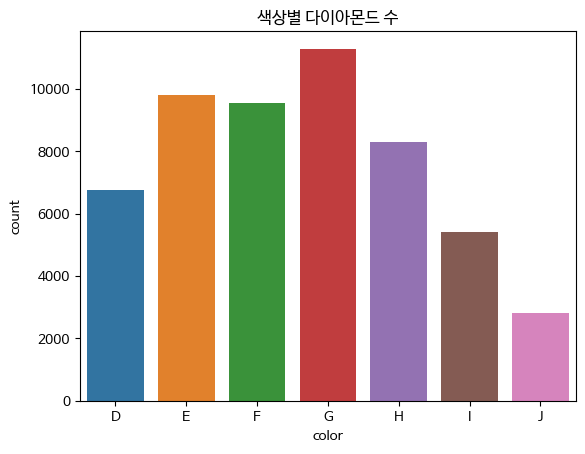

In [12]:
## type your code ##
plt.title("색상별 다이아몬드 수") # 타이틀 입력
plt.xlabel("color") # x label 입력

# count plot 그리기 #
sns.countplot(data=diamonds,x='color')
plt.show();

# 러그 플롯 (rugplot)

러그 플롯은 데이터 위치를 x축 위에 작은 막대로 나타내어 실제 데이터들의 분포를 시각화한다.

러그 플롯을 작성하려면 rugplot 메소드를 주로 rugplot(a, height=0.05, axis=’x’) 형식으로 사용하면 된다.

- a 는 입력하는 데이터 값이다. 1차원 배열(1D Arrary) 형태를 가진다.
- height 는 막대의 길이를,
- axis 는 러그 플롯을 그리는 축을 설정한다. ‘x’ 와 ‘y’ 중 하나를 받으며 기본값은 ‘x’ 로 x축에 러그 플롯을 그린다.

In [41]:
# random dataset 생성
df = pd.DataFrame(np.random.choice(100, (100, 3)), columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,75,20,50
1,68,68,19
2,22,98,83
3,15,77,7
4,21,75,96


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


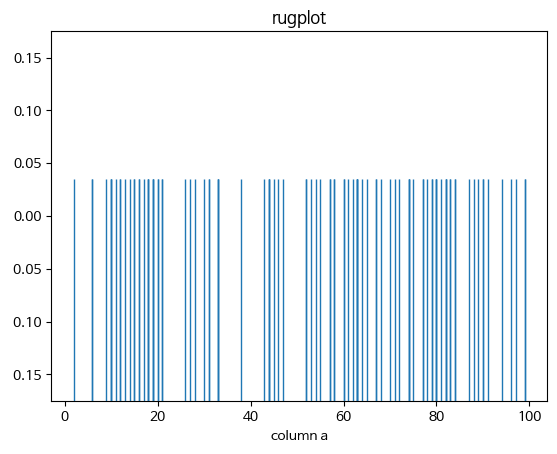

In [14]:
## type your code ##
sns.rugplot(df['a'],height=0.6)

plt.title("rugplot")
plt.xlabel("column a")
plt.show()

# 커널 밀도 플롯 (kdeplot)
커널(kernel)이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 시각화한다.

히스토그램은 데이터의 밀도를 간단한 형태로 표현해주는 그래프로서 모양이 막대(bin)의 시작점과 폭에 의존하며 추정한 밀도가 불연속적이라 매끄럽지 못한 경우가 있다. 커널 밀도 플롯은 커널 함수를 사용하여 이런 단점들을 완화한다.

커널 함수란 확률 분포를 나타내기에 적합한 함수로서 원점을 중심으로 대칭이고, 적분이 1인 양의 함수를 뜻한다.

- 커널 함수에는 가우시안(Gaussian), 코사인(Cosine), Epanechnikov, uniform 등이 있는데, seaborn에서는 기본값으로 가우시안 커널 함수를 사용한다.

커널 밀도 플롯을 작성하려면 kdeplot 메소드를 주로 kdeplot(data, data2=None, shade=False, vertical=False, kernel=’gau’) 형식으로 사용하면 된다.

- data 는 입력하는 데이터 값이다. 1차원 배열(1D Arrary) 형태를 가진다.
- data2 도 입력하는 데이터 값이다. 1차원 배열(1D Arrary) 형태를 가지는데 두 개 변수를 가지는 커널 밀도 플롯을 그릴 때 설정한다.
- shade 는 bool 자료형을 입력하여 곡선 아래의 공간을 음영 처리할지 설정하며, 기본값은 False로 음영 처리를 하지 않는다.
- vertical 은 bool 자료형을 입력하여 커널 밀도를 표현하는 축을 설정한다. 기본값은 False로 y축에 커널 밀도를 표현한다.
- kernel 은 그려지는 커널 밀도의 형태를 설정한다. {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ } 중 하나를 선택하며 기본값은 ‘gau’ 다.


<ipython-input-30-8dac13a6402c>:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=df['a'],shade=True,kernel='triw')
<ipython-input-30-8dac13a6402c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['a'],shade=True,kernel='triw')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


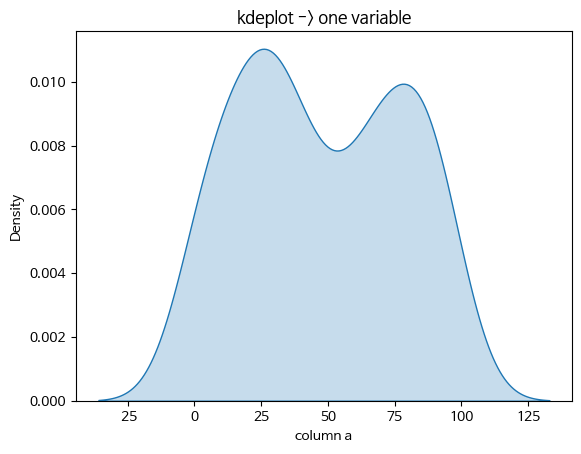

In [30]:
## type your code ##
sns.kdeplot(data=df['a'],shade=True,kernel='triw')

plt.title("kdeplot -> one variable")
plt.xlabel("column a")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


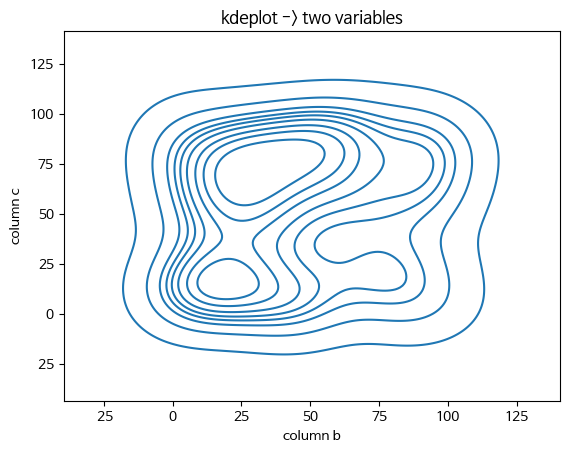

In [50]:
## type your code ##
sns.kdeplot(data=df,x='b', y='c')

plt.title("kdeplot -> two variables")
plt.xlabel("column b")
plt.ylabel("column c")
plt.show()

# 히스토그램 (histogram)
히스토그램은 도수분포표를 시각적으로 표현한 막대 그래프다. 즉, 특정 구간에 속하는 자료의 개수를 나타내는 빈도표(frequency table)인 도수분포표를 시각화한 도형으로 비교할 양이나 수치에 대한 구간별 빈도수를 막대 모양의 도형으로 나타낸 그래프다.

히스토그램을 작성하려면 distplot 메소드를 주로 distplot(a, bins=None, hist=True, kde=True, rug=False) 형식으로 사용하면 된다.

- a 는 입력하는 데이터 값이다. 1차원 배열(1D Array), 리스트(list), 또는 시리즈(series)형태를 가진다.
- bins 는 구간 수, 즉 도형에 들어갈 막대의 개수다. 설정하지 않으면 유용한 결과를 가지도록 자동으로 설정된다.
- hist 에는 bool 자료형을 입력하여 히스토그램을 그릴지 설정한다. 기본값은 True로 히스토그램을 그린다.
- kde 에는 bool 자료형을 입력하여 커널 밀도 플롯을 그릴지 여부를 설정한다. 기본값은 True로 커널 밀도 플롯으로 그린다.
- rug 에는 bool 자료형을 입력하여 러그 플롯으로 그릴지 여부를 설정한다. 기본값은 False로 러그 플롯으로 그리지 않는다.

<ipython-input-54-2ecbb61b8d0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['a'],bins=20,kde=True,rug=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


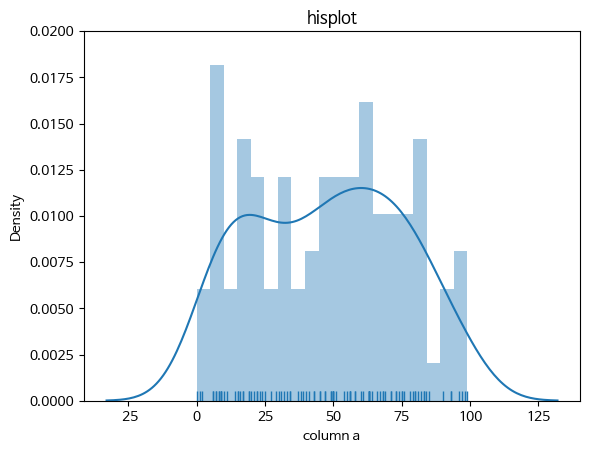

In [54]:
## type your code ##
sns.distplot(df['a'],bins=20,kde=True,rug=True)
plt.title("hisplot")
plt.xlabel("column a")
plt.show()

## 연습문제 2-1

우리가 사용할 dataset은 seaborn에서 제공하는 mpg dataset이다. mpg dataset에서 우리는 연비(mpg)의 전반적인 분포가 궁금하여 러그 플롯을 그리고자 한다. 아래의 과정에 따라 mpg dataset에서 카운트 플롯을 그려보자.

조건은 다음과 같다.
- title은 "연비의 분포"이다.
- x축 라벨은 "mpg"이다.
- rugplot의 height는 0.7로 설정한다.

In [43]:
# loading dataset
# 결과로 출력되는 5개의 행은 mpg dataset에서 상위 5개 데이터를 추출한 것이다.
# 이를 통해 mpg dataset이 어떻게 구성되어 있는지 알 수 있다.
# 우리가 관심있는 column은 mpg이다.
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


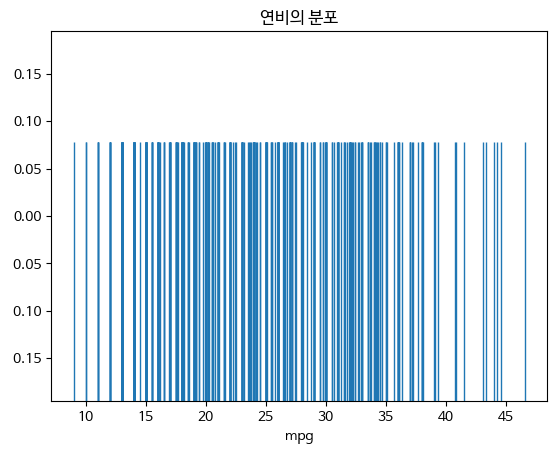

In [45]:
## type your code ##
plt.title("연비의 분포") # 타이틀 입력
plt.xlabel("mpg") # x label 입력

# rug plot 그리기 #
sns.rugplot(mpg['mpg'],height=0.7)
plt.show();

## 연습문제 2-2

이번에 사용할 dataset 역시 seaborn에서 제공하는 mpg dataset이다. mpg dataset에서 우리는 배기량(displacement)과 출력(horsepower)에 따른 전반적인 분포가 궁금하여 kdeplot을 그리고자 한다. 아래의 과정에 따라 mpg dataset에서 kdeplot을 그려보자.

조건은 다음과 같다.
- title은 "배기량과 출력에 따른 kdeplot"이다.
- x축에 배기량(displacement), y축에 출력(horsepower)를 둔다.
- kdeplot에서 shade를 True로 설정한다.

<ipython-input-47-d3e557f2ead2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=mpg['displacement'],y=mpg['horsepower'],shade=True)


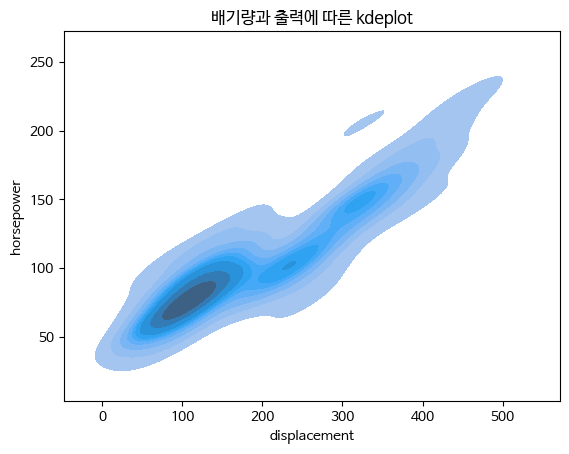

In [47]:
# loading dataset
mpg = sns.load_dataset('mpg')

## type your code ##
plt.title("배기량과 출력에 따른 kdeplot") # title 설정

# kde plot 그리기 #
sns.kdeplot(x=mpg['displacement'],y=mpg['horsepower'],shade=True)
plt.show();

## 연습문제 2-3

이번에 사용할 dataset 역시 seaborn에서 제공하는 mpg dataset이다. mpg dataset에서 우리는 가속능력(acceleration)에 따른 분포가 궁금하여 distplot을 그리고자 한다. 아래의 과정에 따라 mpg dataset에서 distplot을 그려보자.

조건은 다음과 같다.
- title은 "가속능력에 따른 distplot"이다.
- distplot에서 bins는 10로 두고, 커널 밀도 플롯과 러그 플롯을 모두 시각화한다.

<ipython-input-57-9f2fdaa8c89e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mpg['acceleration'],bins=10,kde=True, rug=True)


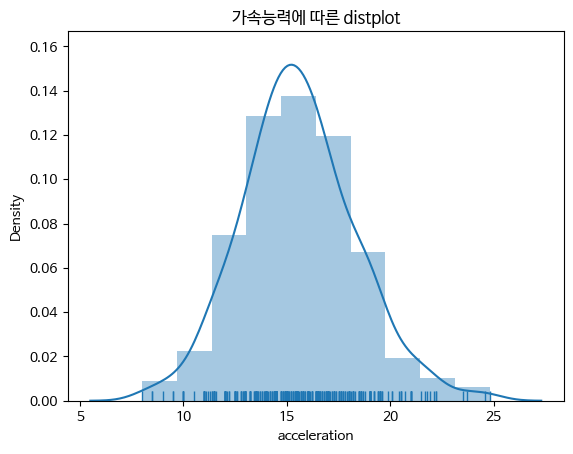

In [57]:
# loading dataset
mpg = sns.load_dataset('mpg')

## type your code ##
plt.title("가속능력에 따른 distplot") # title 설정

# dist plot 그리기 #
sns.distplot(mpg['acceleration'],bins=10,kde=True, rug=True)
plt.show();

# 박스 그래프
박스 그래프는 데이터의 분포를 시각적으로 표현한 박스 모양의 그래프다. 데이터의 범위, 중앙값과 이상치를 빠르게 확인할 수 있는 장점이 있다.

박스 그래프의 기본 통계량 설명
- 박스 그래프는 데이터에서 사분위수를 계산하고 제 1 사분위(Q1)와 제 3 사분위(Q3)를 밑변으로 하는 박스를 그린다.
- 제 3 사분위 수 Q3은 전체 자료의 중앙값을 기준으로 봤을때 중앙값보다 큰 값들의 중앙값으로 누적 백분율이 25% 에 해당하는 값이다
- 제 1 사분위 수 Q1은 전체 자료의 중앙값을 기준으로 봤을때 중앙값보다 작은 값들의 중앙값으로 누적 백분율이 75% 에 해당하는 값이다.
- 중앙값의 좌우로부터 동일한 백분율을 가진 두 점간의 거리를 계산하기 위해서 제 3 사분위수에서 제 1 사분위수를 빼서 사분위수 범위 IQR(interquartile range)를 계산한다. Q1 - 1.5 * IQR 보다 작거나 Q3 + 1.5 * IQR 보다 큰 값은 이상치이다.
- 박스 그래프 바깥의 선은 이상치를 제외한 최댓값과 최솟값을 의미한다.

박스 그래프를 작성하려면 boxplot 메소드를 주로 boxplot(x=None, y=None, hue=None, data=None, order=None, orient=None, fliersize=5) 형식으로 사용하면 된다.

- x, y 에는 데이터의 변수명을 입력한다. x 와 y 중 수치형 데이터 값이 적어도 하나는 들어가야 박스 그래프가 생성된다. 범주형 데이터 값을 가지는 변수명과 수치형 데이터 값을 가지는 변수명을 사용하면 범주별로 박스 그래프가 생성된다.
- hue 에는 데이터의 변수명이 입력하며 생성한 박스들은 입력한 변수의 범주에 따라 색으로 나눠준다.
- data 는 입력하는 전체 데이터의 이름이다. x, y 를 입력하지 않고 data 만 입력하면 전체 데이터를 옆으로 긴 데이터프레임(long-form dataframe)으로 인식하여 수치형 변수들에 대해서만 박스 그래프를 작성한다.
- order 에는 문자열의 리스트를 입력하여 각 범주값이 그래프에 박스로 그려지는 순서를 설정한다.
- orient 는 ‘v’ 또는 ‘h’ 를 입력해 박스가 그려지는 방향을 vertical(세로) 또는 horizontal(가로)로 설정한다. 기본값은 None으로 x와 y 중 수치형 데이터를 입력한 축의 방향으로 그려진다. 즉 y축에 수치형 데이터 값을 가지는 변수명을 입력하면 박스 그래프는 세로로 그린다. 수치형 변수들에 대해서만 박스 그래프를 작성할 때 사용한다.
- fliersize 는 데이터의 이상치를 표시하는 마커의 사이즈를 설정한다.

In [58]:
# make datasets
label_list1 = ['A', 'B', 'C', 'D']
label_list2 = ['X', 'Y', 'Z']

array = [[label_list1[i//25]] + [label_list2[i%3]] + list(np.random.choice(100, 3)) for i in range(100)]

df = pd.DataFrame(array, columns=['label1', 'label2', 'a', 'b', 'c'])
df.head()

,label1,label2,a,b,c
0,A,X,52,96,51
1,A,Y,14,61,1
2,A,Z,34,48,15
3,A,X,92,0,76
4,A,Y,4,3,34


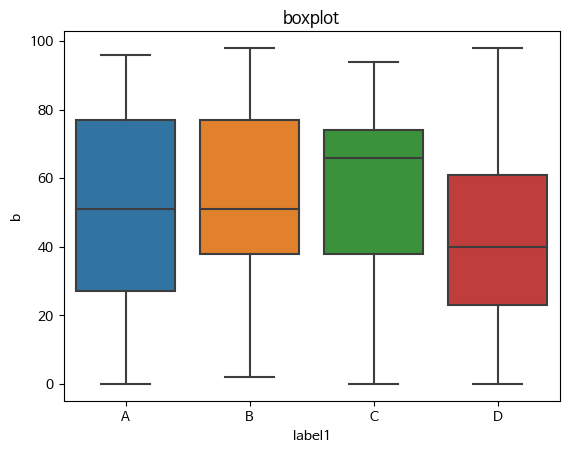

In [59]:
## type your code ##
sns.boxplot(data=df,x='label1',y='b')

plt.title("boxplot")
plt.show()

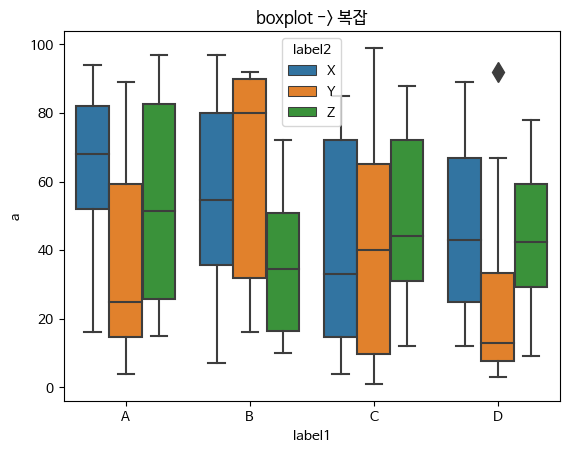

In [62]:
## type your code ##
sns.boxplot(data=df,x='label1',y='a',hue='label2',fliersize=10)

plt.title("boxplot -> 복잡")
plt.show()

# 바이올린 플롯
바이올린 플롯은 박스 그래프를 그리고 그 위에 커널 밀도 플롯을 좌우 대칭으로 그려 데이터의 분포를 표현하는 그래프이다.

바이올린 플롯을 작성하려면 violinplot 메소드를 주로 violinplot(x=None, y=None, hue=None, data=None, order=None, scale=’area’, inner=’box', orient=None) 형식으로 사용하면 된다.

- x, y 에는 데이터의 변수명을 입력한다. x 와 y 중 수치형 데이터 값이 적어도 하나는 들어가야 바이올린 플롯이 생성된다. 범주형 데이터 값을 가지는 변수명과 수치형 데이터 값을 가지는 변수명을 사용하면 범주별로 바이올린 플롯이 생성된다.
- hue 에는 데이터의 변수명을 입력하며 생성한 바이올린 도형들을 입력한 변수의 범주에 따라 색으로 나눠준다.
- data 는 입력하는 전체 데이터의 이름이다. x, y 를 입력하지 않고 data만 입력하면 전체 데이터를 옆으로 긴 데이터프레임(long-form dataframe)으로 인식하여 수치형 변수들에 대해서만 바이올린 플롯을 작성한다.
- order 에는 문자열의 리스트를 입력하여 각 범주값이 그래프에 바이올린 도형으로 그려지는 순서를 설정한다.
- scale은 각 바이올린 도형의 너비를 조정하는 방법이다. {‘area’ | ‘count’ | ‘width’} 중 하나를 선택하여 기본값은 ‘area’ 로 바이올린 도형의 면적(area)이 같도록 한다. ‘count’ 를 입력하면 바이올린 도형의 너비는 데이터 개수에 따라 조정된다. ‘width’ 를 입력하면 모든 바이올린 도형은 같은 너비를 가지게 된다.
- inner 는 각 바이올린 도형 내부에 그릴 그래프나 도형을 선택한다. {‘box’ | ‘quartile’ | ‘point’ | ‘stick’ | None}’ 중 하나를 선택하며 기본값은 ‘box’ 로 작은 박스 그래프를 그린다. ‘quartile’ 은 사분위 값을 바이올린 도형안에 점선으로 표시한다. ‘point’ 와 ‘stick’ 는 데이터 포인트를 각각 점과 선으로 표시한다.
- orient는 ‘v’ 또는 ‘h’ 를 입력 받아 바이올린 플롯이 그려지는 방향을 vertical(세로) 또는 horizontal(가로)로 설정한다. 기본값은 None으로 x와 y 중 수치형 데이터를 입력한 축의 방향으로 그린다. 즉 y축에 수치형 데이터 값을 가지는 변수명이 입력되면 바이올린 플롯은 세로로 그려진다. 수치형 변수들에 대해서만 바이올린 플롯을 작성할 경우 사용한다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


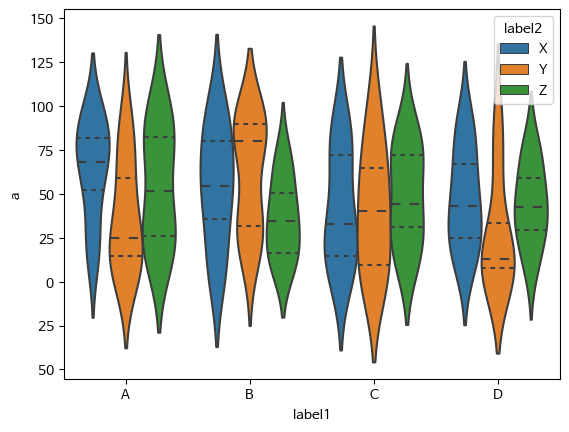

In [65]:
## type your code ##
sns.violinplot(data=df,x='label1',y='a',hue='label2',scale='width',inner='quartile')
plt.show()

## 연습문제 3-1

우리가 사용할 dataset은 seaborn에서 제공하는 tips dataset이다. tips dataset에서 우리는 요일(day)별 총 계산 요금(total_bill)의 분포가 궁금하여 요일별 boxplot을 그려보고자 한다. 아래의 과정에 따라 tips dataset에서 boxplot을 그려보자.

조건은 다음과 같다.
- title은 "요일별 팁 비용 boxplot"이다.
- x축 tick은 목요일, 금요일, 토요일, 일요일로 라벨링한다.
- x축 라벨은 "요일"이다.
- y축 라벨은 "총 계산 요금"이다.
- boxplot에서 이상치 점의 사이즈는 2로 설정한다.

In [66]:
# loading dataset
# 결과로 출력되는 5개의 행은 tips dataset에서 상위 5개 데이터를 추출한 것이다.
# 이를 통해 tips dataset이 어떻게 구성되어 있는지 알 수 있다.
# 우리가 관심있는 column은 total_bill, day 이다.
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


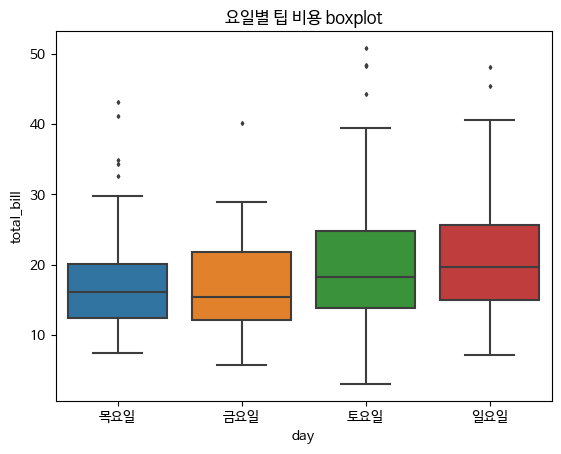

In [71]:
## type your code ##
plt.title("요일별 팁 비용 boxplot") # 타이틀 입력
plt.xlabel("요일") # x label 입력
plt.ylabel("총 계산 요금") # y label 입력

ax = sns.boxplot(data=tips,x='day',y='total_bill',fliersize=2) # box plot 그리기
ax.set_xticklabels(["목요일","금요일","토요일","일요일"]) # x tick label 설정
plt.show();

## 연습문제 3-2

이번에 사용할 dataset도 seaborn에서 제공하는 tips dataset이다. tips dataset에서 우리는 식사 인원(size)과 흡연 여부(smoker)에 따른 팁(tip)의 분포가 궁금하여 violinplot을 그려보고자 한다. 아래의 과정에 따라 tips dataset에서 violinplot을 그려보자.

조건은 다음과 같다.
- title은 "식사 인원, 흡연 여부에 따른 tip 요금 violinplot"이다.
- violinplot에서 x를 tip, y를 size로 하고, 가로 방향으로 violinplot을 돌려서 그린다.
- violinplot에서 각 데이터 포인트를 "점"으로 찍을 수 있도록 옵션을 조정한다.
- x축 라벨은 "팁 비용"이다.
- y축 라벨은 "식사 인원 수"이다.


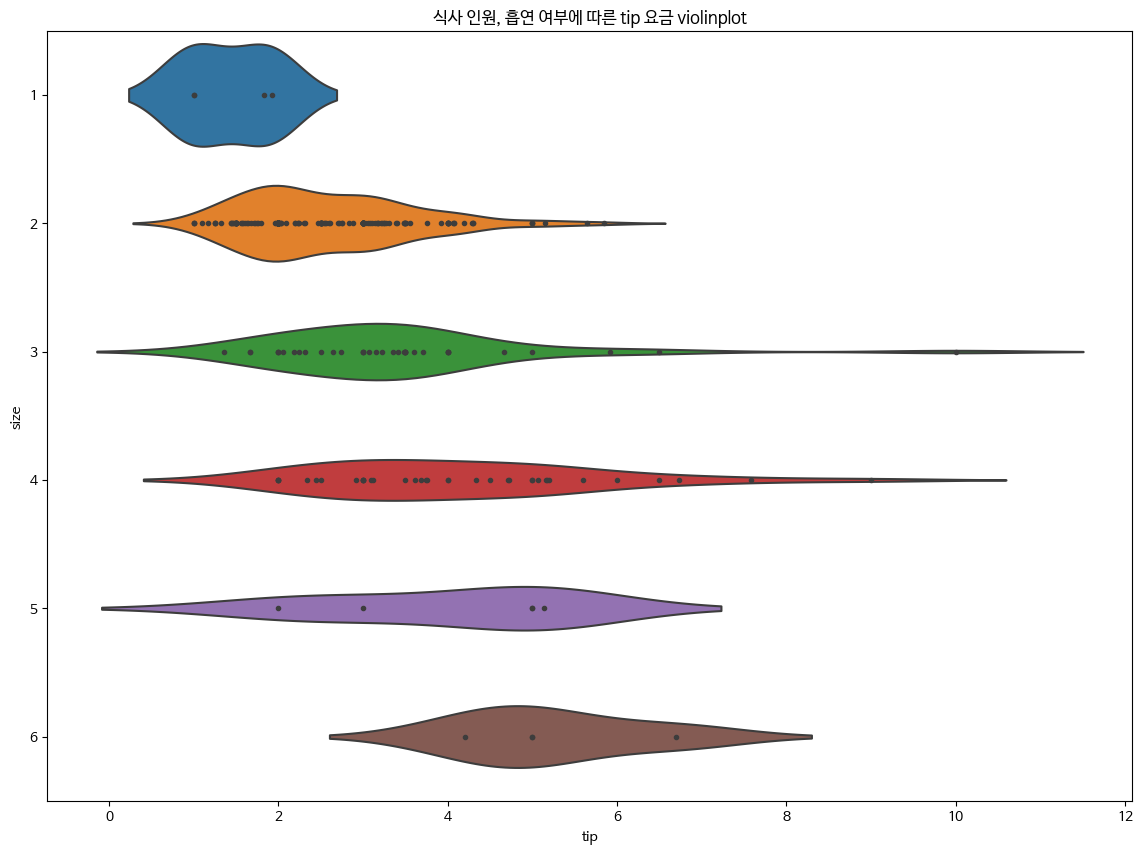

In [72]:
# load datasets
tips = sns.load_dataset('tips')

plt.figure(figsize=(14, 10)) # figsize 조정 (그대로 두시면 됩니다!)

## type your code ##
# title, xlabel, ylabel 설정 #
plt.title("식사 인원, 흡연 여부에 따른 tip 요금 violinplot")
plt.xlabel("팁 비용")
plt.ylabel("식사 인원 수")
# violin plot 그리기 #
sns.violinplot(data=tips,x='tip',y='size',orient='h',inner='point')
plt.show();

# Plotly

Plotly란?

- interactive한 표현을 제공하는 파이썬 그래픽 라이브러리
- JavaScript로 구현된 plotly.js 를 기반으로 파이썬에서 생성한 데이터 시각화 객체를 Javascript로 생성해주는 패키지
- 사용자의 반응에 따른 동적 인터랙티브 데이터 시각화가 가능
- plotly 로 표현시, 사용자가 직접 데이터의 확인이 가능하고, 줌인, 줌아웃 등의 동작을 비교적 쉽게 구현 가능
- 지원하는 파이썬의 그래픽 라이브러리를 참고하려면, 아래 링크를 참고
    https://plotly.com/python/

# Plotly 설치 및 불러오기

In [73]:
!pip3 install plotly

In [74]:
# 버전 확인하기
import plotly
print('Plotly version...', plotly.__version__)

Plotly version... 5.13.1


In [75]:
# graph_objects 패키지를  go 로 불러옴
import plotly.graph_objects as go

# express 패키지를  px로 불러옴
import plotly.express as px

# Plotly 기초

- graph_objects 모듈을 활용
    
    - Figure는 Plotly 작업의 기본 단위.
    - Figure는 go.Figure() 함수를 통해 생성이 가능. go.Figure 힘수의 구조는 data와 layout 총 2개를 input으로 받는 구조.
    
        - data는 일명 "Trace" 를 Python List 형태로 받는데, Trace는 그리고자 하는 그래프의 타입(ex. Bar, Scatter, Line, Box..)과 그 그래프에 시각화 하고자 하는 Raw 데이터를 품고있는 단위.
    
        - layout은 그래프의 data와는 무관하고 그외 모든 부분을 편집 및 가공하는 부분. Title, legend, Colors, Hover-label, Axes, Shape 등 그래프 등 시각화를 높히기 위한 다양한 도구들은 모두 layout을 통해 지정.


- express 모듈을 활용
    
    - 그래프를 이미 제작되어있는 템플릿으로 빠르게 제작하는 방법으로 매우 짧은 코드만으로 양질의 그래프를 제작할수있는 high-level 모듈.

express는 사용자가 빠르게 데이터 분석을 진행할때 활용을 추천.
</br>
graph_objects 는 논문, 발표자료와 같이 그래프 visualization에 중점을 두었을 경우 활용을 추천.
</br>

![express_graphobjects.png](attachment:express_graphobjects.png)

In [77]:
## type your code ##
# go.Figure() 함수를 활용하여 기본 그래프를 생성
fig=go.Figure(
    data=[go.Bar(x=[1,2,3],y=[1,3,2])],
    layout=go.Layout(
        title=go.layout.Title(text="Bar graph using Graph Objects")
    )
)
fig.show()

In [79]:
## type your code ##
# px.bar() 함수를 활용해서 bar chart 생성과 동시에 Data, Layout 값 입력
fig=px.bar(
    x=["a","b","c"],
    y=[1,3,2],
    title="Bar graph using Express"
)
fig.show()

# Basic Charts

## 산점도
Scattor Plot(산점도)는 두 변수의 상관관계를 점으로 표현한 그래프이다.

산점도를 작성하려면 **scatter** 메소드를 주로 **scatter(*x, y, data_frame=None, color=None, symbol=None, hover_name=None, trendline=None*)** 형식으로 사용하면 된다.
- ***x*** 와 ***y*** 는 입력되는 데이터 값이다.
- ***data_frame*** 은 입력되는 dataframe이다.
- ***color*** 는 색으로 구분하고 싶은 데이터 컬럼명이다.  
- ***symbol*** 는 점 스타일을 다르게 반영하고 싶은 데이터 컬럼명이다.
- ***hover_name*** 은 tooltip에 볼드체로 이름으로 표시할 데이터 컬럼명이다.
- ***trendline*** 는 추세선을 삽입할 수 있는 옵션이다.
    - 해당 기능을 사용하기 위해서는 statsmodels 패키지를 추가 설치해야 한다.
        ```python
            !pip install statsmodels
        ```
    -  trendline = {"ols", "lowess", "rolling", "ewm", "expanding" } 추세선의 종류를 선택할 수 있다.
        - ols : ordinary least square의 약자로 최소자승법으로 회귀 모델
        - lowess : locally weighted scatterplot smoothing
        - rolling : 기본 이동 평균선
        - expanding : Cumulative 이동 평균선
        - ewm : exponentially weighted 이동평균선

In [80]:
## type your code ##
fig=px.scatter(x=[0,1,2,3,4],y=[0,1,4,9,16])
fig.show()

In [83]:
df = sns.load_dataset("iris")

## type your code ##
fig=px.scatter(
    data_frame=df,
    x='sepal_width',
    y='sepal_length',
    color='species',
    symbol='species',
    trendline='ols'
)
fig.show()

## 버블 차트 (Bubble Charts)

버블 차트는 marker의 사이즈를 이용해 3차원의 데이터를 표현할 수 있는 산점도이다. 즉, 산점도의 특수한 케이스로 이해하면 된다.

버블 차트를 작성하려면 **scatter** 메소드를 주로 **scatter(*x, y, data_frame=None, size=None*)** 형식으로 사용하면 된다.

- ***x***, ***y***, ***data_frame***은 위의 산점도에서 기술했던 것과 같은 항목이다.
- ***size*** 는 점 크기를 달리 할 기준이 되는 데이터 컬럼명이다.

In [84]:
# make dataframe
df = pd.DataFrame(
    [
        [1, 10, 400],
        [2, 11, 200],
        [3, 12, 800],
        [4, 13, 2000]
    ],
    columns=["x", "y", "population"]
)

df.head()

,x,y,population
0,1,10,400
1,2,11,200
2,3,12,800
3,4,13,2000


In [86]:
## type your code ##
fig=px.scatter(data_frame=df,x="x",y="y",size="population", size_max=60)
fig.show()

## 간트차트 (Gantt Charts)

Gantt Chart 시간 경과에 따른 프로젝트 계획을 시각화하는 방법으로 어떤 작업이 언제, 누구에 의해 완료될 예정인지 보여준다.

간트 차트를 작성하려면 **timeline** 메소드를 주로 **timeline(*data_frame, x_start, x_end, y, color=None*)** 형식으로 사용하면 된다.

- ***data_frame*** 은 입력되는 dataframe이다.
- ***x_start*** 는 일정 시작 컬럼, ***x_end*** 는 일정 끝 컬럼이다.
- ***y*** 는 y축에 들어갈 범주형 데이터이다.
- ***color*** 는 색으로 구분하고 싶은 범주형 데이터 컬럼명이다. 주로 프로젝트별 담당자를 구분할 때 사용한다.

In [87]:
# 데이터셋 만들기
df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28', Resource="Alex"),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15', Resource="Alex"),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30', Resource="Max")
])

df.head()

,Task,Start,Finish,Resource
0,Job A,2009-01-01,2009-02-28,Alex
1,Job B,2009-03-05,2009-04-15,Alex
2,Job C,2009-02-20,2009-05-30,Max


In [88]:
## type your code ##
fig=px.timeline(df, x_start="Start",x_end="Finish", y="Task", color="Resource")
# 위에서부터 시작하게 Y축 역방향으로 설정
fig.update_yaxes(autorange="reversed")
fig.show()

## 연습문제 4-1

이번에 사용할 dataset은 plotly에서 제공하는 gapminder dataset이다. gapminder dataset에서 1972년 데이터의 1인당 GDP(gdpPercap)와 기대수명(lifeExp) 사이의 관계가 궁금하여, 이 둘을 축으로 하는 산점도를 그려보고자 한다. 아래의 과정에 따라 gapminder dataset에서 산점도를 그려보자.

조건은 다음과 같다.
- x축은 1인당 GDP, y축은 기대수명으로 한다.
- 연도에 따라 색상을 달리하여 산점도를 그린다.
- 추세선은 ols로 삽입한다.

In [89]:
# loading dataset
# 1972년 데이터를 추출한다.
# 결과로 출력되는 5개의 행은 gapminder dataset에서 상위 5개 데이터를 추출한 것이다.
# 이를 통해 gapminder dataset이 어떻게 구성되어 있는지 알 수 있다.
# 우리가 관심있는 column은 lifeExp, year, gdpPercap 이다.
gapminder = px.data.gapminder()
gapminder['year'] = gapminder['year'].astype(str)

gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [90]:
## type your code ##
fig = px.scatter(gapminder,x='gdpPercap',y='lifeExp',color='year', trendline='ols') # 산점도 그리기

fig.show()

## 연습문제 4-2

이번에 사용할 dataset은 plotly에서 제공하는 gapminder dataset이다. gapminder dataset에서 우리는 2007년 데이터셋에 대해, 1인당 GDP(gdpPercap)와 기대수명(lifeExp)를 축으로 하고, 각 국가의 인구 수(pop)를 버블의 크기로 하는 버블 차트를 그려보고자 한다. 아래의 과정에 따라 gapminder dataset에서 버블 차트를 그려보자.

조건은 다음과 같다.
- x축은 1인당 GDP, y축은 기대수명으로 한다.
- 버블의 크기는 인구수에 따라 달리 한다.
- 대륙 (continent)에 따라 버블의 색상(color)를 달리 한다.
- size_max 옵션은 60으로 설정한다.
- 깔끔한 결과를 위하여 log_x 옵션을 True로 설정한다.
- tooltip에 각 데이터 포인트의 이름을 표시하기 위하여, 나라명(country)으로 설정한다.

In [91]:
# loading dataset
# 데이터셋에서 연도가 2007년인 것만 추출하였다.
# 결과로 출력되는 5개의 행은 gapminder dataset에서 상위 5개 데이터를 추출한 것이다.
# 이를 통해 gapminder dataset이 어떻게 구성되어 있는지 알 수 있다.
# 우리가 관심있는 column은 continent, lifeExp, pop, gdpPercap 이다.
gapminder = px.data.gapminder()

df_2007 = gapminder[gapminder['year']==2007]
df_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [94]:
## type your code ##
fig = px.scatter(df_2007,x='gdpPercap',y='lifeExp',size='pop',color='continent',log_x=True, size_max=60,hover_name='country') # 버블 차트 그리기

fig.show()

# Scientific Charts

## 히트맵 (Heatmap)

Heatmaps 은 열을 뜻하는 히트(heat)와 지도를 뜻하는 맵(map)을 결합시킨 단어로, 2차원 평면 위애 색을 활용하여 다양한 정보를 표현하는 방법이다.

히트맵을 작성하려면 **imshow** 메소드를 주로 **imshow(*data, labels=None, x=None, y=None, text_auto=False*)** 형식으로 사용하면 된다.

- ***data*** 은 입력되는 dataframe이다.
- ***labels*** 는 x축 라벨, y축 라벨에 들어갈 문구를 선택할 수 있다.
- ***x*** 는 x축 axis에 들어갈 값, ***y*** 는 y축 axis에 들어갈 값이다.
- ***text_auto*** 는 값을 표시할지 선택하는 옵션이다. 기본값은 False이고, True로 설정하면 각 element의 수치를 히트맵에 표시할 수 있다.

In [95]:
## type your code ##
fig=px.imshow(
    [[1,20,30],
     [20,1,60],
     [30,60,1]],
    x=['A','B','C'],
    y=['1','2','3'],
    text_auto=True
)
fig.show()

In [97]:
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]

## type your code ##
fig=px.imshow(
    data,
    labels=dict(x='Day of Week', y='Time of Day'),
    x=['Monday','Tuesday','Wednesday',"Thursday",'Friday'],
    y=['Morning','Afternoon','Evening'],
    text_auto=True
)
fig.show()

## 레이더 차트 (Radar Chart)

Radar Chart는 Spider Plot 또는 Star Plot 이라고도 불리며 한국말로는 방사형 차트이다. 축에 매핑된 3개 이상의 정량적 변수에 대한 다변량 데이터를 표시한다. 해당 제품, 서비스 또는 스포츠 선수 능력치와 같은 유사점 차이점 및 이상값을 한눈에 파악이 쉽다.

레이더 차트를 작성하려면 **line_polar** 메소드를 주로 **line_polar(*data_frame, r=None, theta=None, color=None, line_close=False*)** 형식으로 사용하면 된다.

- ***data_frame*** 은 입력되는 dataframe이다.
- ***r*** 은 레이더 차트에서 각 row의 크기를 결정할 수치형 컬럼명, ***theta*** 는 레이더 차트에서 각 row의 이름을 결정할 범주형 컬럼명이다.
- ***color*** 는 카테고리컬 데이터 별 Radar 그래프 생성을 하는 컬럼명이다.
- ***line_close*** 는 레이더 차트의 선을 닫을지 결정하는 옵션으로, 기본값은 False이다.

In [98]:
# 데이터 생성
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['파워 (장타력)','스피드 (주루)','컨택트 (타격 정확도)',
           '순발력 & 핸들링 (수비)', '어깨 (송구 능력)']))

df

,r,theta
0,1,파워 (장타력)
1,5,스피드 (주루)
2,2,컨택트 (타격 정확도)
3,2,순발력 & 핸들링 (수비)
4,3,어깨 (송구 능력)


In [100]:
## type your code ##
fig=px.line_polar(
    data_frame=df,r='r',theta='theta',line_close=True
)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [101]:
# 데이터 생성
df = pd.DataFrame(dict(
    r=list(np.random.choice(np.arange(1, 6), (20))),
    theta=['파워 (장타력)','스피드 (주루)','컨택트 (타격 정확도)',
           '순발력 & 핸들링 (수비)', '어깨 (송구 능력)'] * 4,
    name=[f"player_{i//5+1}" for i in range(20)])
)

df

,r,theta,name
0,4,파워 (장타력),player_1
1,4,스피드 (주루),player_1
2,2,컨택트 (타격 정확도),player_1
3,3,순발력 & 핸들링 (수비),player_1
4,2,어깨 (송구 능력),player_1
5,1,파워 (장타력),player_2
6,4,스피드 (주루),player_2
7,1,컨택트 (타격 정확도),player_2
8,2,순발력 & 핸들링 (수비),player_2
9,4,어깨 (송구 능력),player_2


In [103]:
## type your code ##
fig=px.line_polar(data_frame=df,r='r',theta='theta',color='name',line_close=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## 연습문제 5-1

이번에 사용할 dataset은 plotly에서 제공하는 medal_wide dataset이다. medal_wide dataset은 국가별 금메달, 은메달, 동메달 수를 가지고 있는 데이터인데, 해당 데이터로 히트맵을 그려보고자 한다. 아래의 과정에 따라 medal_wide dataset에서 히트맵을 그려보자.

조건은 다음과 같다.
- x축 라벨은 "국가", y축 라벨은 "메달 수"로 설정한다.
- x의 각 axis에는 세 국가 (South Korea, China, Canada), y의 각 axis에는 세 메달 종류 (gold, silver, bronze) 로 설정한다.
- 각 value가 히트맵 안에 보이도록 옵션을 조정한다.

In [104]:
# loading dataset
# 출력 결과로 medal_wide dataset이 어떻게 구성되어 있는지 알 수 있다.
df = px.data.medals_wide(indexed=True)

df

medal,gold,silver,bronze
nation,,,
South Korea,24,13,11
China,10,15,8
Canada,9,12,12


In [105]:
## type your code ##
fig = px.imshow(
    df,
    labels=dict(x="국가",y="메달 수"),
    x=['South Korea','China','Canada'],
    y=['gold','silver','bronze'],
    text_auto=True
    ) # 히트맵 그리기

fig.show()

## 연습문제 5-2

이번에 사용할 dataset 역시 plotly에서 제공하는 medal_wide dataset이다. 해당 데이터를 적절히 전처리하여 새로운 데이터를 생성하고, 국가별 금메달 수, 은메달 수, 동메달 수를 레이더 차트로 그려보고자 한다. 아래의 과정에 따라 medal_wide dataset에서 레이더 차트를 그려보자.

조건은 다음과 같다.
- 레이더 차트의 크기는 매달 개수 (medal_cnt)로 설정한다.
- 레이더 차트의 라벨은 메달 타입 (medal_type)으로 설정한다.
- 국가별 레이더 차트를 그리기 위하여, 국가에 따라 레이더 차트의 색상을 달리 한다.
- 레이더 차트를 이어주는 옵션을 사용한다.

In [106]:
# loading dataset
# 기존 medal_wide dataset을 flatten한 데이터이다.
df = px.data.medals_wide(indexed=True)

df_flatten = pd.DataFrame(dict(
    country = [list(df.index)[i//3] for i in range(9)],
    medal_type= list(df.columns) * len(df),
    medal_cnt=df.values.flatten())
)

df_flatten

,country,medal_type,medal_cnt
0,South Korea,gold,24
1,South Korea,silver,13
2,South Korea,bronze,11
3,China,gold,10
4,China,silver,15
5,China,bronze,8
6,Canada,gold,9
7,Canada,silver,12
8,Canada,bronze,12


In [107]:
## type your code ##
fig = px.line_polar(
    data_frame=df_flatten,
    r='medal_cnt',
    theta='medal_type',
    color='country',
    line_close=True

) # 레이더 차트 그리기

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Financial Charts

## 캔들스틱 차트 (Candlestick Chart)

Candlestick chart는 캔들스틱차트 또는 봉차트 라고 불리우며 주식을 비롯한 유가증권과 파생상품, 환율의 가젹 움직임을 보여주는 금융 차트이다.

캔들스틱 차트는 plotly의 express에서는 지원하지 않는다. 따라서 해당 차트는 예외적으로 plotly의 graph_objects를 이용하여 그릴 것이다.

캔들스틱 차트를 작성하려면 **graph_objects.Candlestick** 메소드를 주로 **graph_objects.Candlestick(*x, open, high, low, close*)** 형식으로 사용하면 된다.

- ***x*** 는 날짜 리스트이다.
- ***open*** 는 시가 리스트이다.
- ***high*** 는 고가 리스트이다.
- ***low*** 는 저가 리스트이다.
- ***close*** 는 종가 리스트이다.

In [108]:
# 예시 데이터
data = [
    {'date': '2022-01-01', 'open': 100, 'high': 150, 'low': 80, 'close': 120},
    {'date': '2022-01-02', 'open': 110, 'high': 160, 'low': 90, 'close': 130},
    {'date': '2022-01-03', 'open': 120, 'high': 170, 'low': 100, 'close': 140},
    {'date': '2022-01-04', 'open': 130, 'high': 170, 'low': 110, 'close': 140},
    {'date': '2022-01-05', 'open': 140, 'high': 160, 'low': 120, 'close': 140},
    {'date': '2022-01-06', 'open': 120, 'high': 170, 'low': 100, 'close': 130},
    {'date': '2022-01-07', 'open': 160, 'high': 180, 'low': 140, 'close': 150},
    {'date': '2022-01-08', 'open': 150, 'high': 190, 'low': 150, 'close': 160},
    {'date': '2022-01-09', 'open': 130, 'high': 160, 'low': 110, 'close': 130},
    {'date': '2022-01-10', 'open': 150, 'high': 190, 'low': 130, 'close': 140},

]

df = pd.DataFrame(data)

df

,date,open,high,low,close
0,2022-01-01,100,150,80,120
1,2022-01-02,110,160,90,130
2,2022-01-03,120,170,100,140
3,2022-01-04,130,170,110,140
4,2022-01-05,140,160,120,140
5,2022-01-06,120,170,100,130
6,2022-01-07,160,180,140,150
7,2022-01-08,150,190,150,160
8,2022-01-09,130,160,110,130
9,2022-01-10,150,190,130,140


In [111]:
## type your code ##
fig=go.Figure(
    data=[go.Candlestick(x=df['date'],
                         open=df['open'],
                         high=df['high'],
                         low=df['low'],
                         close=df['close'])]
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## 퍼널 차트 (Funnel Chart)

퍼널 차트는 비즈니스에서 각 단계의 고객 수 혹은 이탈율 등을 파악하기 위하여 그리는 차트이다. 비즈니스에서 각 단계 중 어떤 프로세스에서 병목 현상이 생기는지 파악하는 것은 중요하다. 그것을 도와주는 것이 퍼널 차트이다.

퍼널 차트를 작성하려면 **funnel** 메소드를 주로 **funnel(*data, x, y, color*)** 형식으로 사용하면 된다.

- ***data*** 는 퍼널 차트를 그릴 데이터이다.
- ***x*** 는 각 퍼널의 크기를 결정할 수치형 컬럼명이다.
- ***y*** 는 각 퍼널의 이름을 결정할 범주형 컬럼명이다.
- ***color*** 는 색상을 달리 하여 퍼널 차트를 그릴 기준이 되는 컬럼명이다.

In [112]:
# make datasets
stages = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"]
df_mtl = pd.DataFrame(dict(number=[39, 27.4, 20.6, 11, 3], stage=stages))
df_mtl['office'] = 'Montreal'
df_toronto = pd.DataFrame(dict(number=[52, 36, 18, 14, 5], stage=stages))
df_toronto['office'] = 'Toronto'
df = pd.concat([df_mtl, df_toronto], axis=0)

df

,number,stage,office
0,39.0,Website visit,Montreal
1,27.4,Downloads,Montreal
2,20.6,Potential customers,Montreal
3,11.0,Requested price,Montreal
4,3.0,invoice sent,Montreal
0,52.0,Website visit,Toronto
1,36.0,Downloads,Toronto
2,18.0,Potential customers,Toronto
3,14.0,Requested price,Toronto
4,5.0,invoice sent,Toronto


In [113]:
## type your code ##
fig=px.funnel(df,x='number',y='stage',color='office')
fig.show()

## 연습문제 6-1

이번에 사용할 dataset은 plotly에서 제공하는 Apple의 2015년부터 2017년 까지의 주가 데이터이다. 해당 데이터는 애플의 시가, 종가, 고가, 저가 데이터를 모두 가지고 있다. 아래의 과정에 따라 캔들스틱 차트를 그려보자.

조건은 다음과 같다.
- 시가는 AAPL.Open, 고가는 AAPL.High, 저가는 AAPL.Low, 종가는 AAPL.Close이다.
- 시각화의 편의를 위하여 다음 코드를 추가한다.
```python
fig.update_layout(xaxis_rangeslider_visible=False)
```

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [116]:
## type your code ##
fig = go.Figure( data=[go.Candlestick(x=df['Date'],
                         open=df['AAPL.Open'],
                         high=df['AAPL.High'],
                         low=df['AAPL.Low'],
                         close=df['AAPL.Close'])]
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## 연습문제 7

이번 연습문제에서 사용할 데이터는 kaggle에서 제공하는 포켓몬 데이터셋이다.

데이터의 컬럼에 대한 설명은 다음과 같다.
- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round


다음 데이터를 이용하여, 이번 강의에서 학습한 여러 그래프를 그려보는 시간을 가질 것이다. 포켓몬 데이터셋을 이용하여 자유롭게 2가지 이상의 그래프를 그려보자. 강의에서 학습한 그래프도 괜찮고, 다른 그래프도 괜찮다.

In [124]:
# loading datasets
# 포켓몬 데이터셋이다.
from google.colab import drive
drive.mount('/content/gdrive/')
pokemon = pd.read_csv('/content/gdrive/MyDrive/pokemon.csv')
pokemon.head()

Mounted at /content/gdrive/


,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [132]:
# 그래프 1
## type your code ##
fig = px.scatter(pokemon,x='Type 1',y='Type 2',color='Legendary', size='Attack', size_max=30) # 산점도 그리기

fig.show()

<ipython-input-141-610aa7b11909>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='Type 1', ylabel='Attack'>

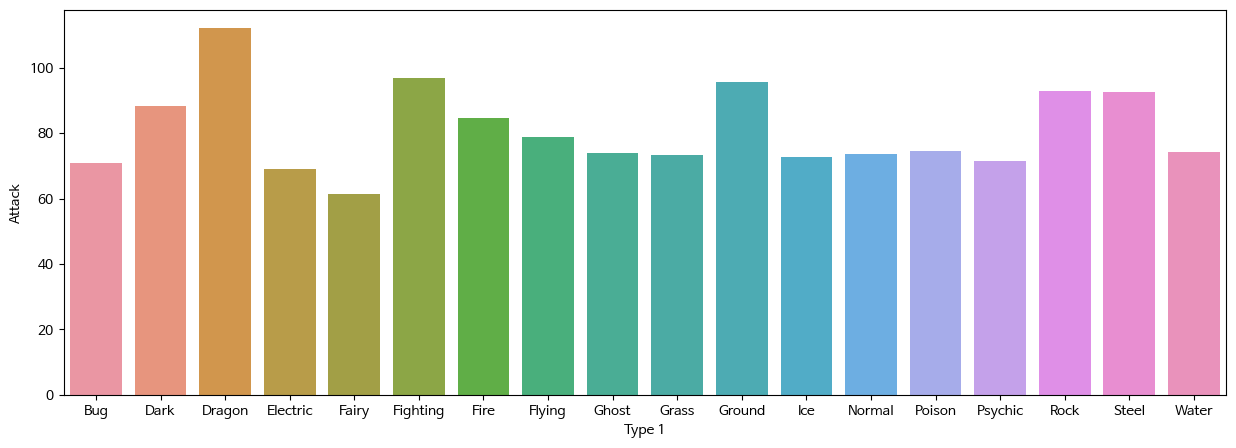

In [141]:
# 그래프 2
## type your code ##
plt.figure(figsize=(15, 5))
group_pokemon = pokemon.groupby('Type 1').mean()[['Attack']]
group_pokemon
group_pokemon.reset_index(level=0, inplace=True)
sns.barplot(data=group_pokemon,x='Type 1',y='Attack')

<img src='https://t3.ftcdn.net/jpg/02/92/36/76/360_F_292367633_TwzHFo2XLSSbcihgxESm2sKcQ0NlwrIG.jpg' alt="The end" />